In [125]:
import tensorflow as tf


In [126]:
mnist=tf.keras.datasets.mnist

devide into train and test

In [127]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [128]:
x_train.shape

(60000, 28, 28)

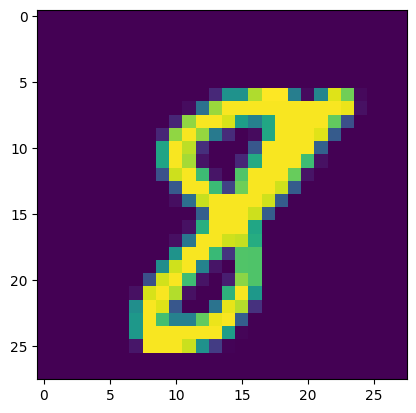

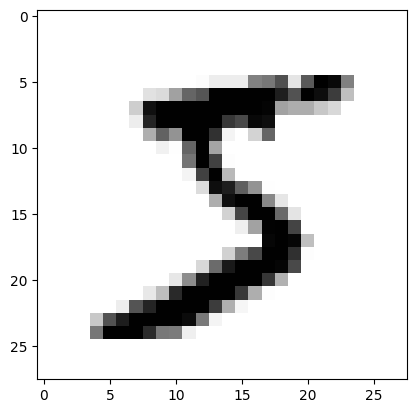

In [129]:
import matplotlib.pyplot as plt
plt.imshow(x_train[55])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)



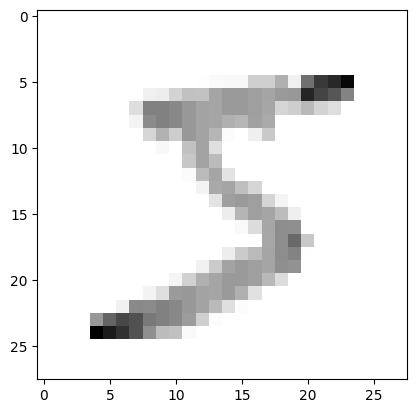

In [130]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [19]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [131]:
import numpy as np 
IMG_SIZE = 28  
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Reshape for training data
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    # Reshape for testing data

# Print the shape of the reshaped data
print("Training Samples dimension:", x_train.shape)
print("Testing Samples dimension:", x_test.shape)


Training Samples dimension: (60000, 28, 28)
Testing Samples dimension: (10000, 28, 28)


Deep Neural Network

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation ,Flatten,Conv2D , MaxPool2D

64 filters of 3*3 

In [133]:
model=Sequential()
# first convolutional layer  28-3+1= 26*26
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 2nd convolutional layer 11*11 ( maxpooling /2)
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))


# 3rd convolutional layer 
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# connected layer 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# final connected layer (number of classes)
model.add(Dense(10)) 
model.add(Activation("softmax"))


C:\Users\henda\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
model.fit(x_trainr,y_train,epochs=15, validation_split=0.3)

Epoch 1/15


C:\Users\henda\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.7712 - loss: 0.7020 - val_accuracy: 0.9594 - val_loss: 0.1336
Epoch 2/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 55s 42ms/step - accuracy: 0.9653 - loss: 0.1130 - val_accuracy: 0.9683 - val_loss: 0.1087
Epoch 3/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 46s 35ms/step - accuracy: 0.9758 - loss: 0.0796 - val_accuracy: 0.9762 - val_loss: 0.0775
Epoch 4/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 55s 42ms/step - accuracy: 0.9812 - loss: 0.0615 - val_accuracy: 0.9722 - val_loss: 0.0897
Epoch 5/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 59s 45ms/step - accuracy: 0.9850 - loss: 0.0461 - val_accuracy: 0.9785 - val_loss: 0.0702
Epoch 6/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.9873 - loss: 0.0390 - val_accuracy: 0.9824 - val_loss: 0.0564
Epoch 7/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9889 - loss: 0.0325 - val_accuracy: 0.9812 - val_loss: 0.0657
Epoch 8/15
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 48s 37ms/step - accuracy: 0.9918 - loss: 0.02

In [137]:
import cv2

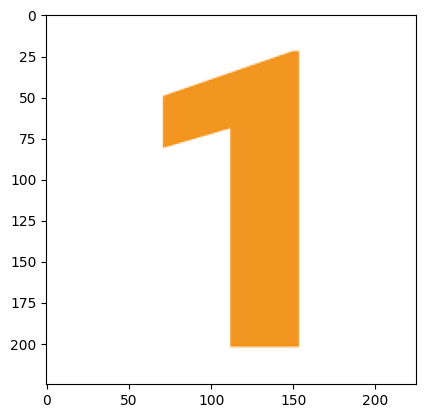

In [138]:
im=cv2.imread("2.png")
plt.imshow(im)


In [139]:
im.shape

(225, 225, 3)

In [140]:
gray=cv2.cvtColor(im,cv2.COLOR_RGB2GRAY)
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

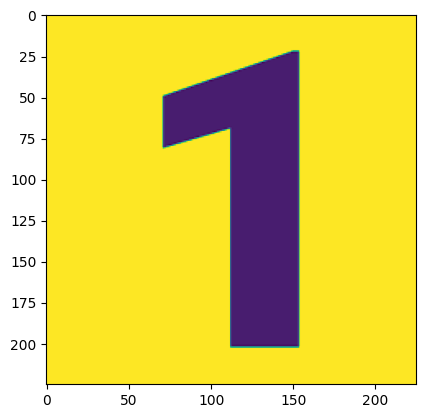

In [141]:
gray.shape
plt.imshow(gray)

In [142]:
newimg=tf.keras.utils.normalize(resized, axis=1)
newimg=np.array(newimg).reshape(-1, IMG_SIZE,IMG_SIZE,1)

In [143]:
newimg.shape

(1, 28, 28, 1)

In [144]:
predictions=model.predict(newimg)
print(np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
0
